In [3]:
rm(list = ls())
options(stringsAsFactors = F)
gc()
library(glmnet)
library(survival)
library(survivalROC)
library(survminer)
library(timeROC)
library("clusterProfiler")
library("org.Hs.eg.db")
library("enrichplot")
library("ggplot2")
library(plyr)
library(ggplot2)
library(grid)
library(gridExtra)
pvalueFilter=0.05      
qvalueFilter=0.05 
source('./00.data/fun.R',print.eval = TRUE)

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,5352814,285.9,8642201,461.6,6568207,350.8
Vcells,8909783,68.0,18227014,139.1,10379523,79.2


In [4]:
rt <- read.table('./fig5/testRisk.txt',header = T,row.names = 1,check.names = F,sep = '\t')

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"Windows字体数据库里没有这样的字体系列"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"Windows字体数据库里没有这样的字体系列"


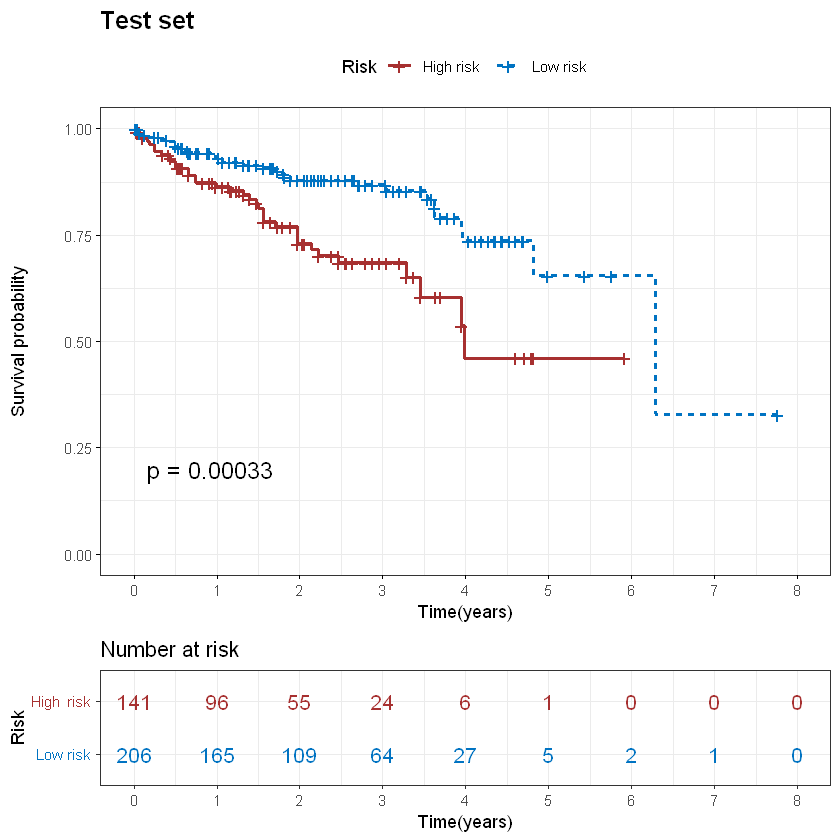

In [5]:
surPlot <- survial_plot1(rt)
print(surPlot)

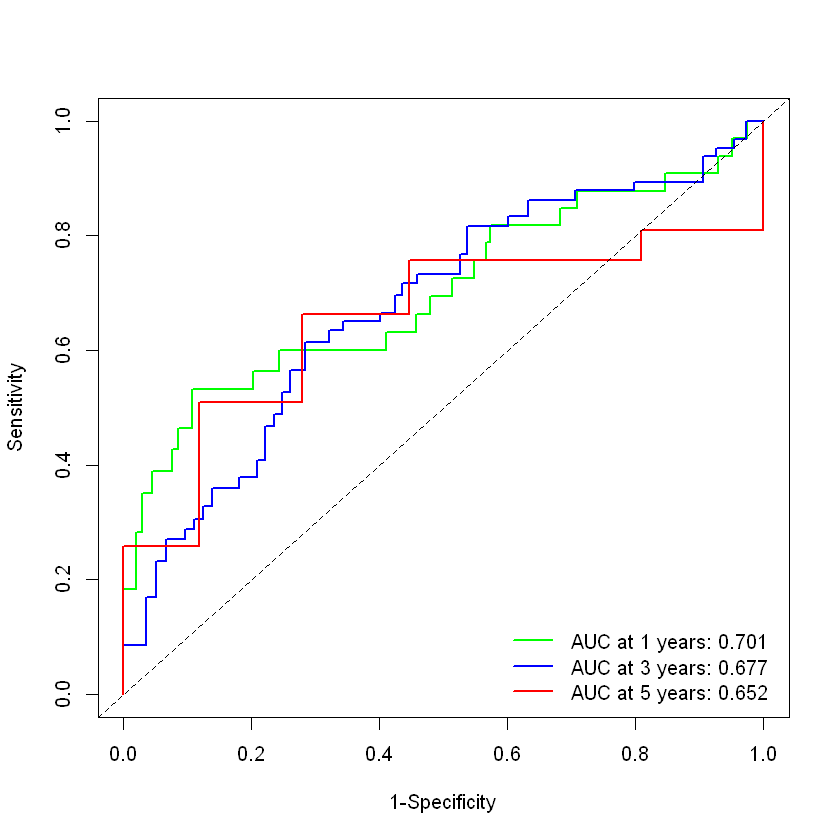

In [6]:
var = 'riskScore'
ROC_rt=timeROC(T=rt$futime, delta=rt$fustat,
               marker=rt[,var], cause=1,
               weighting='aalen',
               times=c(1,3,5), ROC=TRUE)
plot(ROC_rt,time=1,col='green',title=FALSE,lwd=2)
plot(ROC_rt,time=3,col='blue',add=TRUE,title=FALSE,lwd=2)
plot(ROC_rt,time=5,col='red',add=TRUE,title=FALSE,lwd=2)
legend('bottomright',
       c(paste0('AUC at 1 years: ',sprintf("%.03f",ROC_rt$AUC[1])),
         paste0('AUC at 3 years: ',sprintf("%.03f",ROC_rt$AUC[2])),
         paste0('AUC at 5 years: ',sprintf("%.03f",ROC_rt$AUC[3]))),
       col=c("green",'blue','red'),lwd=2,bty = 'n')

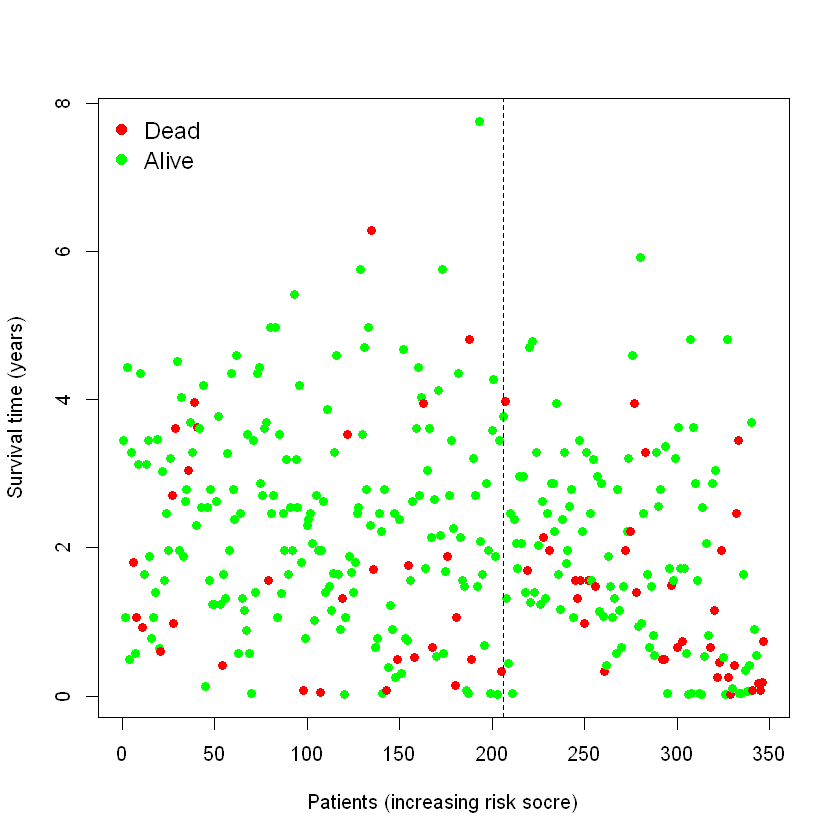

In [7]:
rt=rt[order(rt$riskScore),]
  riskClass=rt[,"risk"]
  lowLength=length(riskClass[riskClass=="Low"])
  highLength=length(riskClass[riskClass=="High"])
  color=as.vector(rt$fustat)
  color[color==1]="red"
  color[color==0]="green"
plot(rt$futime,
       pch=19,
       xlab="Patients (increasing risk socre)",
       ylab="Survival time (years)",
       col=color)
  legend("topleft", c("Dead", "Alive"),bty="n",pch=19,col=c("red","green"),cex=1.2)
  abline(v=lowLength,lty=2)

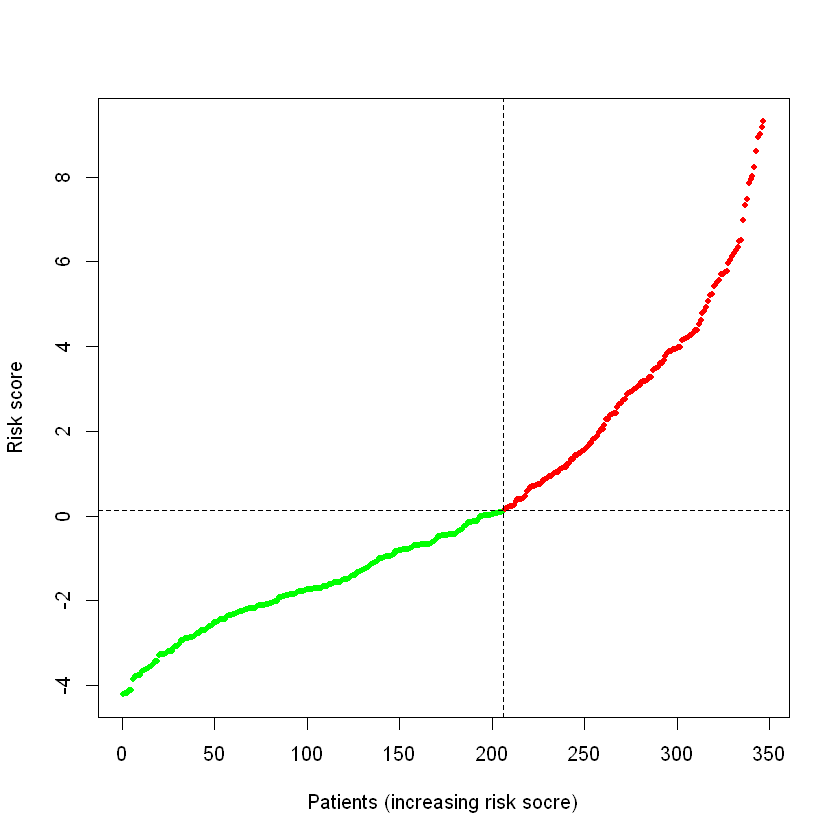

In [9]:
rt=rt[order(rt$riskScore),]
  riskClass=rt[,"risk"]
  lowLength=length(riskClass[riskClass=="Low"])
  highLength=length(riskClass[riskClass=="High"])
  line=rt[,"riskScore"]
  line[line>10]=10
  plot(line,
       type="p",
       pch=20,
       xlab="Patients (increasing risk socre)",
       ylab="Risk score",
       col=c(rep("green",lowLength),
             rep("red",highLength)))
  trainMedianScore=0.126235763844814 #train set cutOp
  abline(h=trainMedianScore,v=lowLength,lty=2)